In [1]:
import pandas as pd

In [11]:
df_crop = pd.read_csv('cropData.csv')
df_air = pd.read_csv('data.csv', encoding="ISO-8859-1")

C:\Users\manus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#conversion to numeric form
df_crop['Year'] = df_crop['Year'].str[:4]
df_crop['Year'] = df_crop['Year'].apply(pd.to_numeric)
df_crop['Year'] = df_crop['Year'] + 1
df_air['date'] = df_air['date'].str[:4]
df_air['date'] = df_air['date'].apply(pd.to_numeric)
df_air['date'] = df_air['date']

df_air = df_air[df_air['date']>2000] #It is observed that df_air ranges from 1997 to 2015

In [13]:
#Format Check
df_crop['District'] = df_crop['District'].str.title()
df_air['location'] = df_air['location'].str.title()

#Spell Check
df_crop['State'] = df_crop['State'].str.replace('Andra Pradesh','Andhra Pradesh')
df_air['state'] = df_air['state'].str.replace('Dadra & Nagar Haveli','Dadra and Nagar Haveli')
df_air['state'] = df_air['state'].str.replace('Jammu & Kashmir','Jammu and Kashmir')
df_crop['State'] = df_crop['State'].str.replace('Maharastra','Maharashtra')
df_air['state'] = df_air['state'].str.replace('Uttaranchal','Uttarakhand')

#Andhra Pradesh
df_air['location'] = df_air['location'].str.replace('Ananthapur','Anantapur')
df_air['location'] = df_air['location'].str.replace('Kakinada','East Godavari')
df_air['location'] = df_air['location'].str.replace('Vijayawada','Krishna')
df_air['location'] = df_air['location'].str.replace('Eluru','West Godavari')
df_air['location'] = df_air['location'].str.replace('Ongole','Prakasam')
df_crop['District'] = df_crop['District'].str.replace('Spsr Nellore','Nellore')
df_crop['District'] = df_crop['District'].str.replace('13.West Godavari','West Godavari')
df_air['location'] = df_air['location'].str.replace('Vishakhapatnam','Visakhapatnam')
#df_air['location'] = df_air['location'].str.replace('Visakhapatanam','Visakhapatnam')
df_crop['District'] = df_crop['District'].str.replace('Visakhapatanam','Visakhapatnam')

#Assam
df_air['location'] = df_air['location'].str.replace('Silcher','Silchar')
df_air['location'] = df_air['location'].str.replace('Silchar','Cachar')
df_air['location'] = df_air['location'].str.replace('Guwahati','Kamrup Metro')
df_air['location'] = df_air['location'].str.replace('Tezpur','Sonitpur')

#Chandigarh
df_crop['District'] = df_crop['District'].str.replace('1.Chandigarh','Chandigarh')

#Chhattisgarh
df_air['location'] = df_air['location'].str.replace('Bhilai Nagar','Durg')

#Gujarat
df_crop['District'] = df_crop['District'].str.replace('Ahmadabad','Ahmedabad')
df_air['location'] = df_air['location'].str.replace('Bhuj','Kachchh')

#Haryana
df_crop['District'] = df_crop['District'].str.replace('22.Yamunanagar','Yamuna Nagar')

#Jharkhand
df_air['location'] = df_air['location'].str.replace('Jamshedpur','East Singhbum')
df_crop['District'] = df_crop['District'].str.replace('24.West Singhbhum','West Singhbhum')

#Karnataka
df_air['location'] = df_air['location'].str.replace('Mangalore','Dakshin Kannad')

#Kerala
df_crop['District'] = df_crop['District'].str.replace('14.Wayanad','Wayanad')
df_air['location'] = df_air['location'].str.replace('Kotttayam','Kottayam')
df_air['location'] = df_air['location'].str.replace('Thissur','Thrissur')

#Maharashtra
df_air['location'] = df_air['location'].str.replace('Chandarpur','Chandrapur')
df_air['location'] = df_air['location'].str.replace('Aurangabad (Ms)','Aurangabad')

#Meghalaya
df_air['location'] = df_air['location'].str.replace('Shillong','East Khasi Hills')
df_air['location'] = df_air['location'].str.replace('Khliehriat','East Jaintia Hills')
df_air['location'] = df_air['location'].str.replace('Tura','West Garo Hills')
df_air['location'] = df_air['location'].str.replace('Nongstoin','West Khasi Hills')
df_crop['District'] = df_crop['District'].str.replace('11.West Khasi Hills','West Khasi Hills')

#Odisha
df_crop['District'] = df_crop['District'].str.replace('Anugul','Angul')
df_crop['District'] = df_crop['District'].str.replace('Baleshwar','Balasore')

#Rajasthan
df_crop['District'] = df_crop['District'].str.replace('33.Udaipur','Udaipur')

#Sikkim
df_air['location'] = df_air['location'].str.replace('Gangtok','East Sikkim')
df_crop['District'] = df_crop['District'].str.replace('East District','East Sikkim')

#Tamil Nadu
df_air['location'] = df_air['location'].str.replace('Madras','Chennai')

#Uttar Pradesh
df_air['location'] = df_air['location'].str.replace('Kanpur','Kanpur Nagar')
df_air['location'] = df_air['location'].str.replace('Noida, Ghaziabad','Ghaziabad')  
df_air['location'] = df_air['location'].str.replace('Rai Bareilly','Rae Bareli')  

#Uttarakhand
df_air['location'] = df_air['location'].str.replace('Rudrapur','Udam Singh Nagar') 

In [14]:
locations = {}
    
for st in df_air['state'].unique():
    location = df_air.loc[df_air['state'] == st]['location'].unique()
    District_Name = df_crop.loc[df_crop['State'] == st]['District'].unique()
    similar_location = [i for i in location if i in District_Name]
    df_air = df_air.drop(df_air.loc[df_air['state'] == st][~df_air['location'].isin(similar_location)].index)
    df_crop = df_crop.drop(df_crop.loc[df_crop['State'] == st][~df_crop['District'].isin(similar_location)].index)
    if (similar_location)!=0:
        locations[st]= similar_location

C:\Users\manus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\manus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


                             counts  percentage
pm2_5                        263240   98.393131
spm                          153421   57.345284
agency                        93720   35.030407
stn_code                      92836   34.699988
so2                           18448    6.895443
rspm                          10070    3.763937
no2                            8854    3.309424
location_monitoring_station    4113    1.537346
type                            735    0.274726


<BarContainer object of 9 artists>

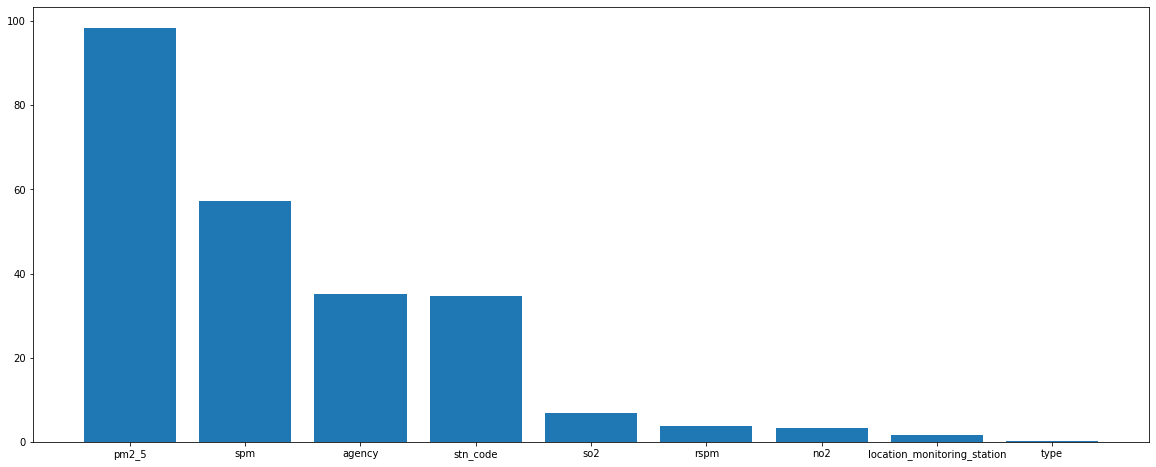

In [15]:
def null_analysis(df):
  '''
  desc: get nulls for each column in counts & percentages
  arg: dataframe
  return: dataframe
  '''
  null_cnt = df.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(df) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table

# visualise null table
import matplotlib.pyplot as plt
null_table = null_analysis(df_air)
print(null_table)
plt.figure(figsize=(20,8))
plt.bar(null_table.reset_index()['index'], null_table.reset_index()['percentage'])

In [16]:
df_air = df_air.drop(['sampling_date','agency','stn_code', 'type', 'pm2_5', 'location_monitoring_station'], axis = 1)
df_air = df_air.dropna(axis=0, subset=['date'])

df_air.drop(df_air[df_air['so2'] == 0].index, inplace = True)
df_air.drop(df_air[df_air['no2'] == 0].index, inplace = True)
df_air.drop(df_air[df_air['rspm'] == 0].index, inplace = True)
df_air.drop(df_air[df_air['spm'] == 0].index, inplace = True)
#df_crop.drop(df_crop[df_crop['Production']==0].index, inplace=True)

In [17]:
df_air.head()

,state,location,so2,no2,rspm,spm,date
898,Andhra Pradesh,Visakhapatnam,15.5,23.1,NaN,202.0,2001.0
899,Andhra Pradesh,Visakhapatnam,12.8,29.2,NaN,210.0,2001.0
900,Andhra Pradesh,Visakhapatnam,17.9,29.5,NaN,192.0,2001.0
901,Andhra Pradesh,Visakhapatnam,19.9,34.9,NaN,171.0,2001.0
902,Andhra Pradesh,Visakhapatnam,13.6,33.4,NaN,125.0,2001.0


In [18]:
sample_states = df_air['state'].unique()

In [19]:
dt = {'state': {}, 'location': {}}
n = 1
for state in df_air['state'].unique():
    dt['state'][state]=n
    n = n + 1
n = 1
for l in df_air['location'].unique():
    dt['location'][l]=n
    n = n + 1
    
#df_air['date'] = df_air['date'].str[:4]
#df_air['date'] = df_air['date'].apply(pd.to_numeric)
df_air = df_air.replace(dt)
df_air = df_air.interpolate(method='linear')
df_air = df_air.interpolate(method='linear', limit_direction='backward')

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_air))

df_air = df_air[(z < 3).all(axis=1)]

In [20]:
rows = []
inputs = ['so2', 'no2', 'rspm', 'spm']
for state in sample_states:
    df0 = df_air.loc[df_air['state'] == dt['state'][state]]
    for place in locations[state]:
        '''if place == 'Rewari':
            continue'''
        df1 = df_air[df_air['location']==dt['location'][place]]
        for year in df1['date'].unique():
            l = [state, place, year]
            for i in inputs:
                df2 = df1[df1['date']==year]
                l.append(df2[i].mean())
            rows.append(l)
            
df = pd.DataFrame(rows, columns = ['State', 'District', 'Year', 'SO2', 'NO2', 'RSPM', 'SPM'])

In [21]:
df

,State,District,Year,SO2,NO2,RSPM,SPM
0,Andhra Pradesh,Visakhapatnam,2001.0,13.569697,22.545455,98.000000,122.545455
1,Andhra Pradesh,Visakhapatnam,2002.0,8.075758,23.533333,98.000000,10.666667
2,Andhra Pradesh,Visakhapatnam,2004.0,10.320000,32.036000,89.780000,135.294000
3,Andhra Pradesh,Visakhapatnam,2005.0,11.755769,32.621154,94.942308,187.211538
4,Andhra Pradesh,Visakhapatnam,2006.0,11.229866,32.091976,99.858841,201.606241
...,...,...,...,...,...,...,...
1230,West Bengal,Howrah,2011.0,10.148276,53.365517,86.793103,230.420727
1231,West Bengal,Howrah,2013.0,10.515600,44.648400,186.989200,107.316800
1232,West Bengal,Howrah,2014.0,8.058824,33.764706,107.833333,62.440000
1233,West Bengal,Howrah,2015.0,14.294118,42.000000,119.372549,62.440000


In [22]:
df1 = pd.merge(df_crop,df)

In [23]:
df1

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,5.291667,21.473958,119.718750,389.201373
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,5.291667,21.473958,119.718750,389.201373
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,5.291667,21.473958,119.718750,389.201373
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,5.291667,21.473958,119.718750,389.201373
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,5.291667,21.473958,119.718750,389.201373
...,...,...,...,...,...,...,...,...,...,...,...,...
31823,Tamil Nadu,Sweet potato,Thoothukudi,2015,Whole Year,58.0,1020,17.59,13.264840,18.047945,91.004566,335.404271
31824,Tamil Nadu,Tapioca,Thoothukudi,2015,Whole Year,2.0,65,32.50,13.264840,18.047945,91.004566,335.404271
31825,Tamil Nadu,Turmeric,Thoothukudi,2015,Whole Year,6.0,24,4.00,13.264840,18.047945,91.004566,335.404271
31826,Tamil Nadu,Urad,Thoothukudi,2015,Kharif,254.0,205,0.81,13.264840,18.047945,91.004566,335.404271


In [18]:
df1.to_csv('projectDataset_1.csv',index=False)

In [ ]:
https://colab.research.google.com/drive/11ZJTQGvk-4euJPeWctsnVmL73MsIL9-c#scrollTo=B36D3EuAX-pl